<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [Описание проекта](#0.)
* [1. Откройте файл с данными и изучите общую информацию](#1.)
     - [1.1. Вывод](#1.1.)
* [2. Подготовьте данные](#2.)
     - [2.1. Замена названия столбцов](#2.1.)
     - [2.2. Обработка пропусков и преобразование столбцов к нужным типам](#2.2.)
         - [2.2.1. Вывод](#2.2.1.)
     - [2.3. Добавление столбца с суммарными продажами во всех региона](#2.3.)
         - [2.3.1. Вывод](#2.3.1.)
* [3. Проведите исследовательский анализ данных](#3.)
     - [3.1. Анализ релиза игр по годам](#3.1.)
         - [3.1.1. Вывод](#3.1.1.)
     - [3.2. Анализ продаж по платформам](#3.2.)
         - [3.2.1. Вывод](#3.2.1)
     - [3.3. Определение актуального периода для дальнейшего анализа](#3.3.)
         - [3.3.1. Вывод](#3.3.1)
     - [3.4. Анализ лидирующих по продажам платформ](#3.4.)
         - [3.4.1. Вывод](#3.4.1)
     - [3.5. Построение графиков "ящик с усами" по глобальным продажам в разбивке по платформам](#3.5.)
         - [3.5.1. Вывод](#3.5.1)
     - [3.6. Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков](#3.6.)
         - [3.6.1. Вывод](#3.6.1)
     - [3.7. Анализ влияния на продажи внутри остальных популярных платформ отзывов пользователей и критиков](#3.7.)
         - [3.7.1. Вывод](#3.7.1)
     - [3.8. Анализ распределения продаж по жанрам](#3.8.)
         - [3.8.1. Вывод](#3.8.1)
* [4. Составьте портрет пользователя каждого региона](#4.)
     - [4.1. Определение для пользователей каждого региона (NA, EU, JP): самых популярных платформ, жанров и игр в разрезе рейтинга ESRB.](#4.1.)
         - [4.1.1. Вывод](#4.1.1)
* [5. Проверьте гипотезы](#5.)
     - [5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1.)
     - [5.2. Средние пользовательские рейтинги жанров Action и Sports разные](#5.2.)
     - [5.3. Вывод](#5.3.)
* [Общий вывод](#6.)

<strong><font size=5>Описание проекта</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<strong><font size=5>1. Откройте файл с данными и изучите общую информацию</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import plotly.express as px


In [2]:
df = pd.read_csv('games.csv', sep=',', index_col=0)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [4]:
df_initial = len(df)

<strong><font size=5>1.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Набор данных состоит из 11 столбцов с разным типом данных, а также из 16715 наблюдений по продажам игр в разных регионах. Видно, что необходима предобработка данных, так как столбцы имеют разную длину. В частности, множество значений в столбцах user_score, crutic_score и rating не заполнены. Для того, чтобы было удобно анализировать данные, необходимо привести названия столбцов к нижнему регистру, а также привести столбцы к нужным типам.

<strong><font size=5>2. Подготовьте данные</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

<strong><font size=5>2.1. Приведение столбцов к нижнему регистру</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [5]:
df.columns = df.columns.str.lower()

<strong><font size=5>2.2. Обработка пропусков и преобразование столбцов к нужным типам</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [6]:
df.dropna(subset=['name', 'year_of_release'], inplace=True)

In [7]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [8]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].fillna('-99')
df['user_score'] = df['user_score'].fillna('-99')
df = df.replace('tbd', '-99')
df['critic_score'] = pd.to_numeric(df['critic_score'])
df['user_score'] = pd.to_numeric(df['user_score'])
df['rating'] = df['rating'].fillna('RP')

<strong><font size=5>2.2.1 Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

В результате обработки выяснили, что в столбцах user_score, critic_score и rating было найдено более 6000 пропущенных значений. Пустые значения в user_score и critic_score были заполнены специальным маркером "-99", чтобы привести столбцы к числовому виду. Был также заменен маркер "tbd" на "-99", так как tbd означает, что оценок слишком мало для определения среднего рейтинга. Приведем столбец year_of_release к типу данных "int", так как он нам необходим для анализа данных. В столбце rating заменим пустые значения на RP (Rating Pending) в соответствии с международной классификацией. 

<strong><font size=5>2.3. Добавление столбца с суммарными продажами во всех регионах</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [9]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99.0,-99.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99.0,-99.0,RP,31.38


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [12]:
df_processed = len(df)
print('Доля очищенных значений из общего количества:', (100 - (df_processed / df_initial) * 100))
print('Количество очищенных значений:', df_initial - df_processed)

Доля очищенных значений из общего количества: 1.6212982351181608
Количество очищенных значений: 271


<strong><font size=5>2.3.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

В результате обработки пропущенных значений было удалено 271 наблюдение, что является 1,6% от общего количества значений. На мой взгляд, данный показатель является приемлымим и обработка произведена успешно. 

<strong><font size=5>3. Проведите исследовательский анализ данных</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

<strong><font size=5>3.1. Анализ релиза игр по годам</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [13]:
name_year_of_release = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
name_year_of_release.columns = ['number_of_games']
name_year_of_release.sort_values(by = 'number_of_games', ascending=False).head(10)

,number_of_games
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


AxesSubplot(0.125,0.125;0.775x0.755)


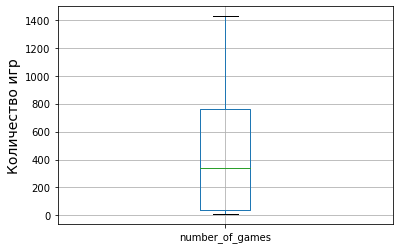

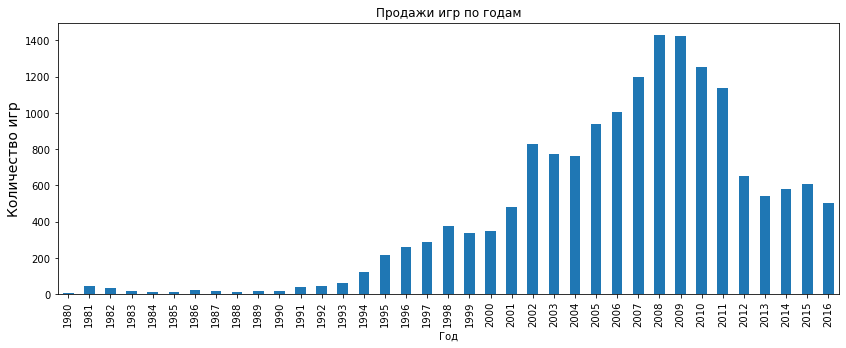

In [14]:
print(name_year_of_release.boxplot())
plt.ylabel('Количество игр', fontsize=14)
plt.show()
name_year_of_release.describe()
dict_for_auto = {
    'number_of_games' : [20, (0,1450)],
}

for column in dict_for_auto.keys():
    quantiles = name_year_of_release[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    name_year_of_release[column].plot(kind='bar', figsize=(14,5))
    plt.ylabel('Количество игр', fontsize=14)
    plt.title('Продажи игр по годам')
    plt.xlabel('Год')
    plt.show()

In [15]:
fig = px.histogram(df,
                   x='year_of_release',
                   y='all_sales',
                   color='platform',
                   title='Гистограмма продаж для платформ',
                   histfunc='sum'
                   )
fig.show()

<strong><font size=5>3.1.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

В результате анализа выпуска игр по годам, наблюдается тенденция к увеличению количества продаж, начиная с 1994 по 2010 с пиком в 2008 и 2009 году, после чего наблюдается тенденция к снижению показателя к текущему 2016 году. Связано это может быть с международным финансовым кризисом, когда покупательская способность у мирового населения снизилась. Согласно графику можем наблюдать, что в 2008 и 2009 году лидируют по доле игр на рынке Wii, DS, X360, PS3. Связано это с тем, что данные платформы только заходили на рынок, поэтому из-за того, что это большие бренды, фанаты ждут выхода новых игр на новых платформах. 

<strong><font size=5>3.2. Анализ продаж по платформам</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [16]:
sales_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending=False)
sales_platform.head(10)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


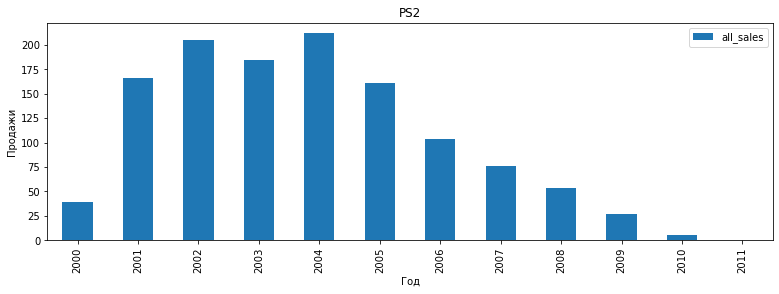

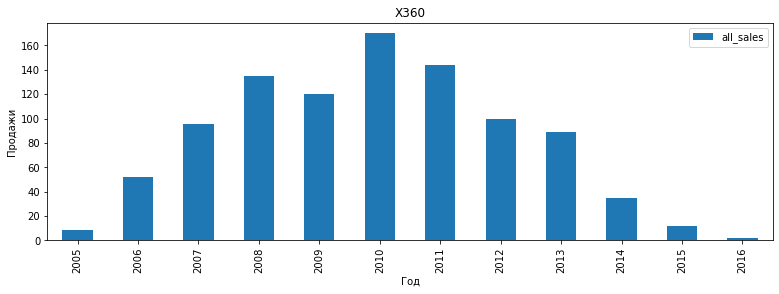

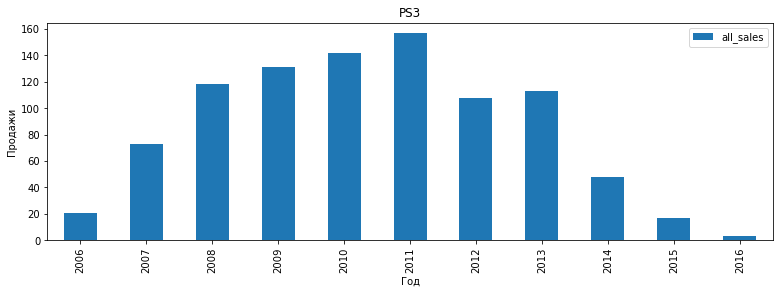

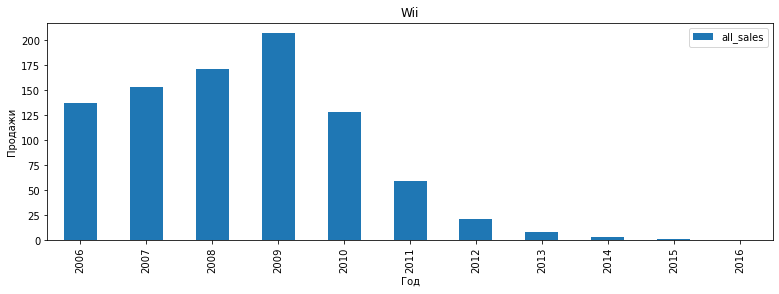

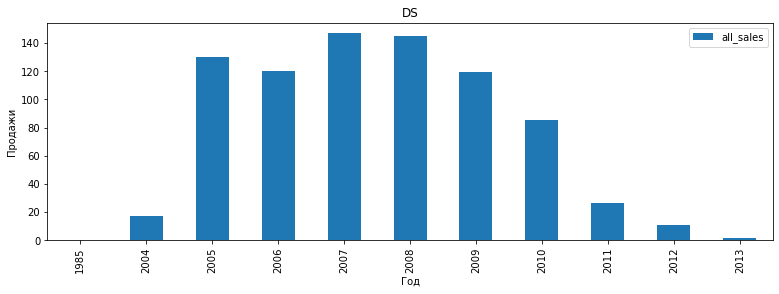

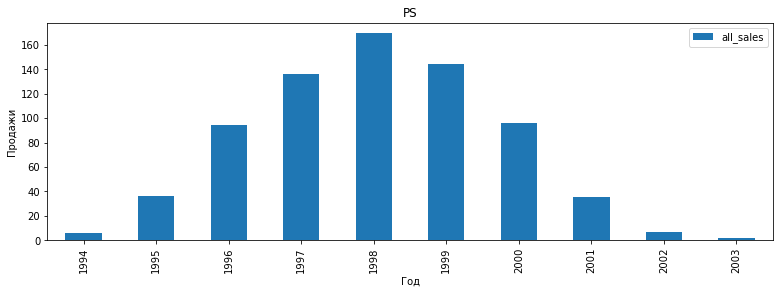

In [17]:
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(kind='bar', figsize=(13, 4))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')

<strong><font size=5>3.2.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Среди глобальных продаж за все время наблюдений лидируют платформы 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. В целом игры на эти платформы, за исключением PS, выходили примерно в одно время параллельно друг другу. При этом в среднем данные платформы "живут" в среднем 8-9 лет, о чем свидетельствую графики распределения 5 самых популярных платформ с соответствующем пиком на 5 год. 

<strong><font size=5>3.3. Определение актуального периода для дальнейшего анализа</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [18]:
df_query = df.query('year_of_release >= 2012')

<strong><font size=5>3.3.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Был выбрал актуальный период с 2012 года по нескольким причинам: 
1) Так как согласно графику распределения глобальных продаж по платформам с 2011 года произошел резкий спад, после чего с 2012 по 2016 продажи находились примерно на одном уровнее. 
2) Так как срок жизни платформ составляет примерно 8 лет, согласно этому 4-летнему периоду в 2017 году будет пиковое значение некоторых платформ. 

<strong><font size=5>3.4. Анализ лидирующих по продажам платформ</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [19]:
platform_all_sales = df_query.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platform_all_sales.columns = ['sales_by_platform']
platform_all_sales.sort_values(by = 'sales_by_platform', ascending=False).head(10)

,sales_by_platform
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


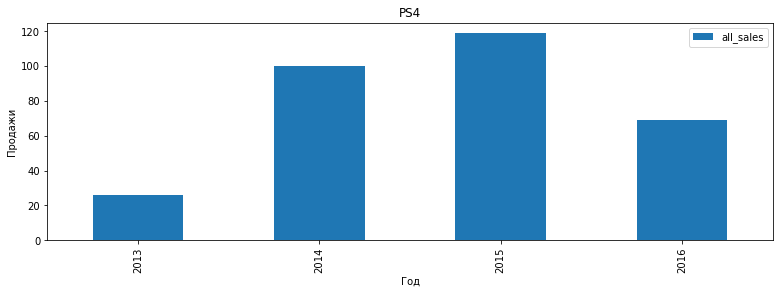

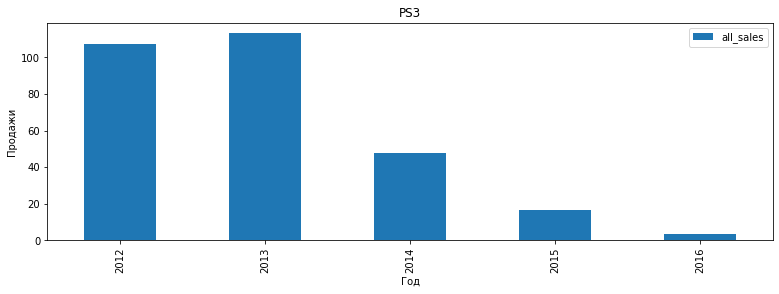

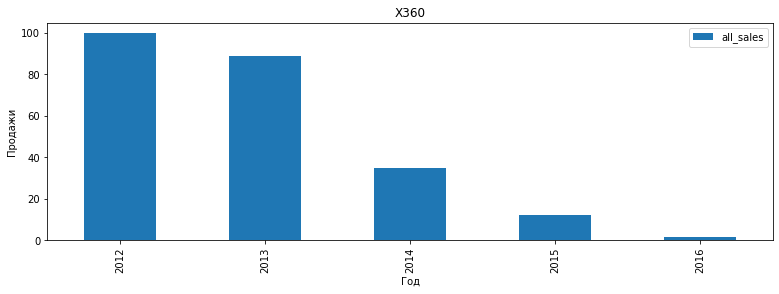

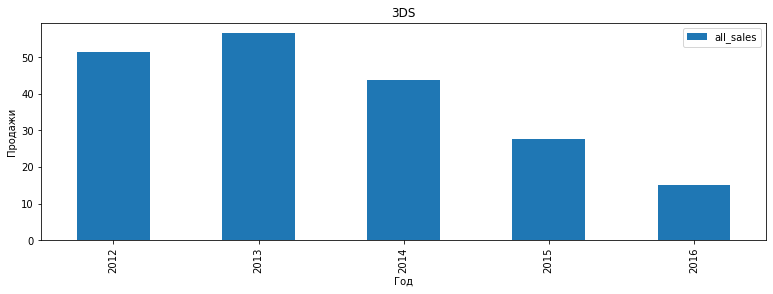

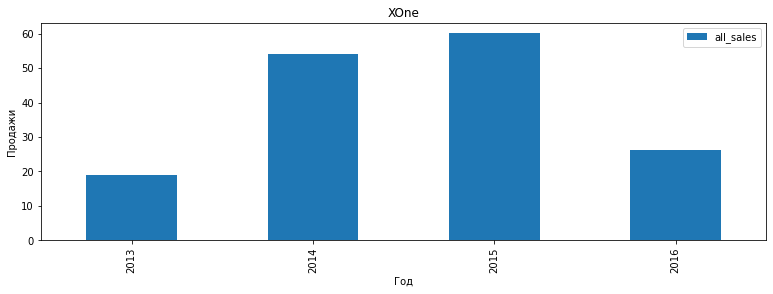

In [20]:
top_5 = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
for platform in top_5:
    df_query[df_query['platform'] == platform].pivot_table(index='year_of_release', values=['platform', 'all_sales'], aggfunc='sum').plot(kind='bar', figsize=(13, 4))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продажи')

<strong><font size=5>3.4.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Для анализа были выбраны первые 5 платформ из актуального периода, так как остальные платформы сильно отличаются по показателям. После построения графиков наблюдается, что платформы X360, 3DS и PS3 находяится в состоянии спада. Можно предположить, что в 2016 году продажи будут также на низком уровне. Для платформ Xone и PS4 наблюдается рост с 2013 года. Так как в 2016 году данные неполные, как понятно из задания, можно предположить, что для этих платформ также будет рост и возможно пик для данных платформ. При этом продажи PS4 в 2016 году находятся на отметке примерно 70 миллионов копий., а для Xone около 25 миллионов копий. 

<strong><font size=5>3.5. Построение графиков "ящик с усами" по глобальным продажам в разбивке по платформам</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [21]:
fig = px.box(df_query,
            x='platform',
            y='all_sales',
            title='Глобальные продажи по платформам за актуальный период',
            labels={'platform' : 'Платформы',
                   'all_sales' : 'Продажи'},
             range_y = (0,4),
             color='platform',
             boxmode='overlay'
            )
fig.update_xaxes(categoryorder='median descending')
fig.show()

<strong><font size=5>3.5.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Согласно графику "ящик с усами" у самых больших по продажам платформ X360, PS4 и PS3 наблюдаются, что основные продажи связаны с так называемыми "выбросами", несмотря на медиану примерно как у других платформ. Это может быть связано с некоторыми эксклюзивами, выходящими только на данных платформах, либо с некоторыми хитами продаж. Это неблагоприятно сказывается на платформе в целом, так как далеко не все игры явялются хорошо продаваемыми. 

<strong><font size=5>3.6. Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [22]:
filter_list_top1 = (df_query['platform'] == "PS4") & (df_query['user_score'] >= 0) & (df_query['critic_score'] >= 0)
filter_list_other = (df_query['platform'] != "PS4") & (df_query['user_score'] >= 0) & (df_query['critic_score'] >= 0)

df_for_ratings_top1 = df_query[filter_list_top1]
df_for_ratings_other = df_query[filter_list_other]

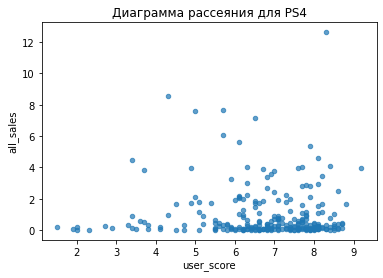

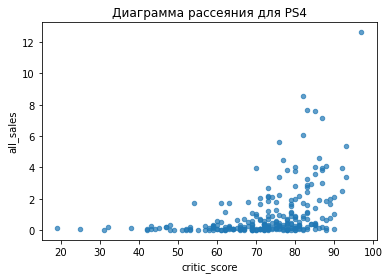

In [23]:
lead_platform = ['PS4']
other_top6_platform =  ('PS3', 'X360', 'Wii', 'XOne', 'WiiU')
score_types = ('user_score', 'critic_score')
 
for platform_name in lead_platform:
    for score_type in score_types:
        (df_for_ratings_top1[df_for_ratings_top1['platform'] == platform_name]
         .plot(x=score_type, 
               y='all_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               alpha = 0.7))
        plt.show()

<strong><font size=5>3.6.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Согласно диаграмме рассеяния между пользовательскими рейтингами и продажами у лидирующей платформы - PS4, наблюдается, что сильной зависимости нет. Можно отметить, что у игр с рейтингом от 6.0 иногда наблюдаются повышенные продажи. Согласно диаграмме рассеяния для PS4 между оценками критиков и продажами наблюдается некоторая зависимость между рейтингом и продажами, но не сильная. У оценок от 70 наблюдаются игры с увеличенными продажами.

<strong><font size=5>3.7. Анализ влияния на продажи внутри остальных популярных платформ отзывов пользователей и критиков</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

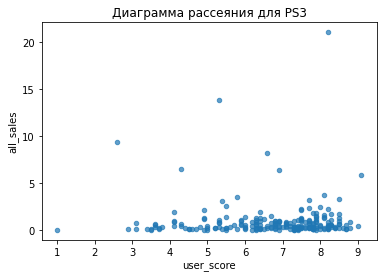

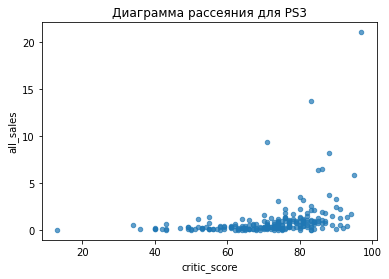

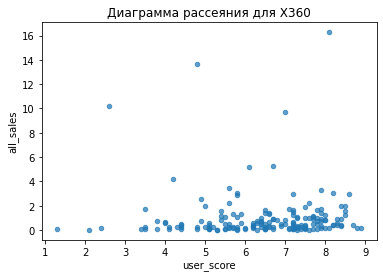

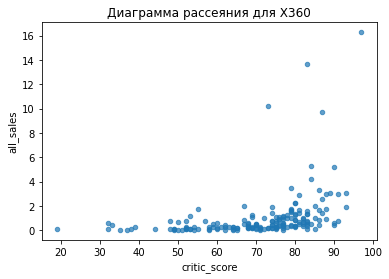

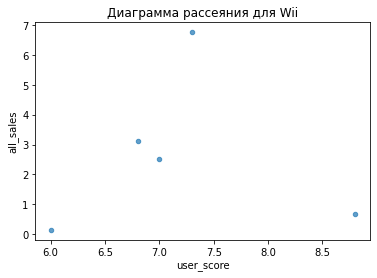

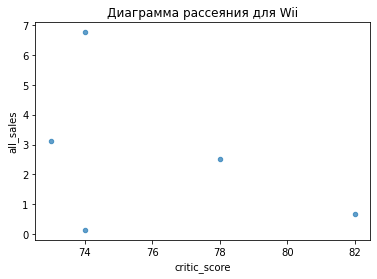

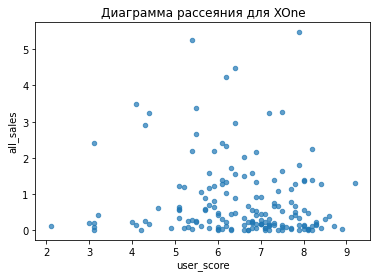

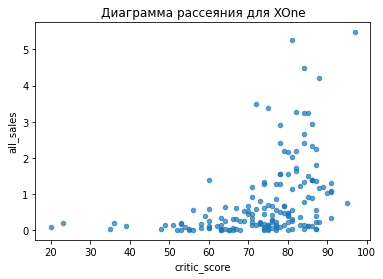

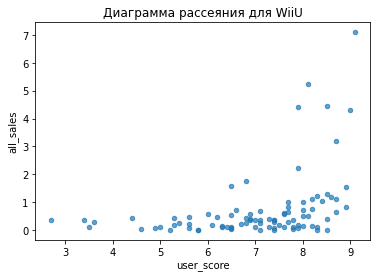

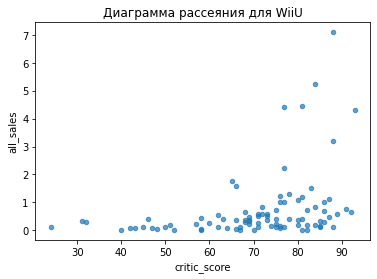

In [24]:
for platform_name in other_top6_platform:
    for score_type in score_types:
        (df_for_ratings_other[df_for_ratings_other['platform'] == platform_name]
         .plot(x=score_type, 
               y='all_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               alpha=0.7))
        plt.show()

Коэффициент корреляции между user_score и all_sales для самой популярной платформы за актуальный период равен -0.03
Коэффициент корреляции между user_score и all_sales для остальных платформ из Топ-6 по популярности за актуальный период равен 0.01
Коэффициент корреляции между critic_score и all_sales для самой популярной платформы за актуальный период равен 0.41
Коэффициент корреляции между critic_score и all_sales для остальных платформ из Топ-6 по популярности за актуальный период равен 0.28


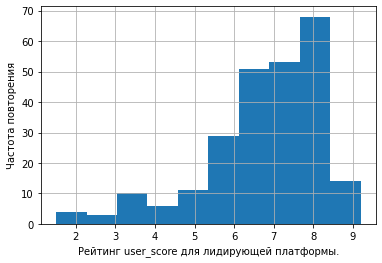

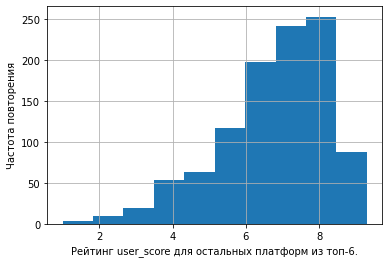

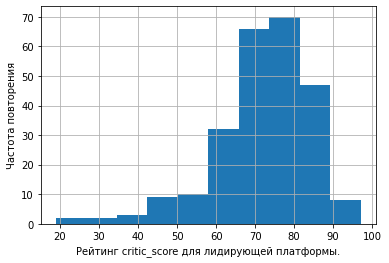

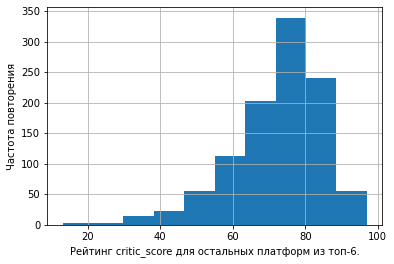

In [25]:
for score_type in score_types:
    print('Коэффициент корреляции между {} и {} для самой популярной платформы за актуальный период равен {:.2f}'.format(score_type, 'all_sales', df_for_ratings_top1[score_type].corr(df_for_ratings_top1['all_sales'])))
    print('Коэффициент корреляции между {} и {} для остальных платформ из Топ-6 по популярности за актуальный период равен {:.2f}'.format(score_type, 'all_sales', df_for_ratings_other[score_type].corr(df_for_ratings_other['all_sales'])))
    
for score_type in score_types:
    df_for_ratings_top1[score_type].hist()
    plt.xlabel('Рейтинг {} для лидирующей платформы.'.format(score_type))
    plt.ylabel('Частота повторения')
    plt.show()
    df_for_ratings_other[score_type].hist()
    plt.xlabel('Рейтинг {} для остальных платформ из топ-6.'.format(score_type))
    plt.ylabel('Частота повторения')
    plt.show()

<strong><font size=5>3.7.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Согласно расчетам коэффициента корреляции и диаграмм рассеяния для Лидирующей платформы и для остальных платформ из топ-6 между user_score и all_sales существует слабая отрицательная и слабая положительная связь соответственно, но оба значения находятся около 0. При  этом между critic_score и all_sales существует и для лидирующей платформы и для остальных платформ из топ-6 средняя положительная связь. Этим расчетам можно доверять, так как профессиональные критики оценивают каждую отдельную игру критически согласно своим независимым показателям. Чаще всего для лидирующей платформы встречается среди пользовательких оценок оценка 8.0 - около 70 значений. В то время как у остальных платформ также наблюдается оценка 8, но при этом чаще встречаются оценки от 6 до 8. Среди оценок критиков для лидирующей платформы встречаются чаще всего оценка 80, но и часто встречается оценка около 75. В то время как для остальных платформ критики ставили оценки около 80.

<strong><font size=5>3.8. Анализ распределения продаж по жанрам</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [26]:
genre_all_sales = df_query.pivot_table(index='genre', values='all_sales', aggfunc='sum')
genre_all_sales.columns = ['sales_by_genre']
genre_all_sales.sort_values(by = 'sales_by_genre', ascending=False)

,sales_by_genre
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


<AxesSubplot:xlabel='genre'>

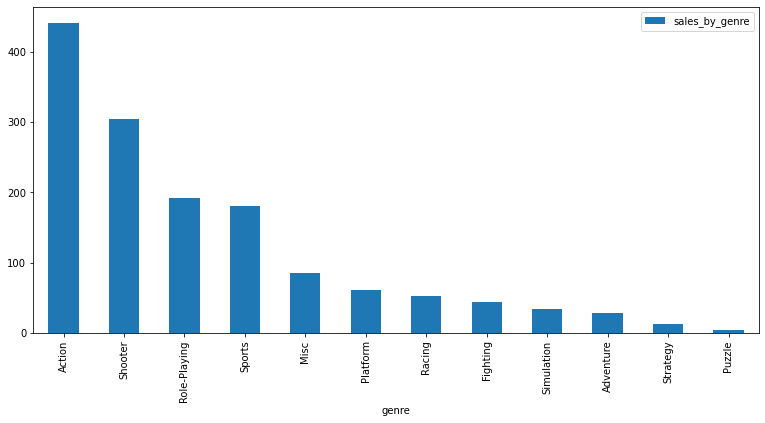

In [27]:
genre_all_sales.sort_values(by = 'sales_by_genre', ascending=False).plot(kind='bar', figsize=(13, 6))

<strong><font size=5>3.8.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

За актуальный период лидирует среди продаж жанр "Action". Наиболее популярный жанр среди геймеров в целом среди всех регионов. Также стоит отметить выделяющиеся жанры "Shooter", "Role-Playing" и "Sports". Все эти жанры сильно выделяются среди всех остальных и находятся в периоде свыше 180 миллионов копий.

<strong><font size=5>4. Составьте портрет пользователя каждого региона</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

<strong><font size=5>4.1. Определение для пользователей каждого региона (NA, EU, JP): самых популярных платформ, жанров и игр в разрезе рейтинга ESRB.</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

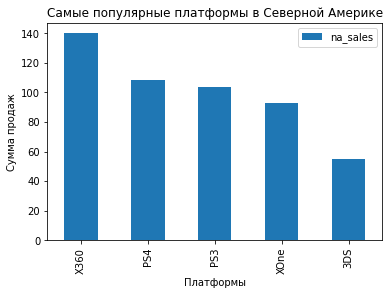

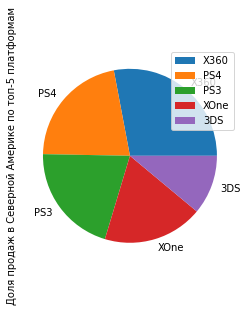

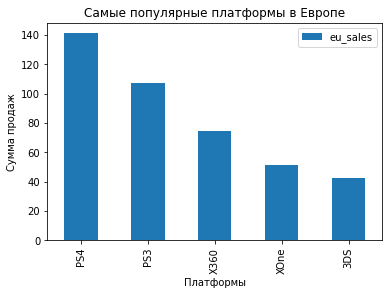

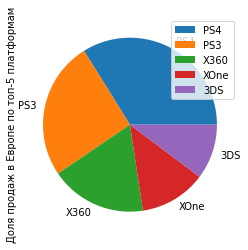

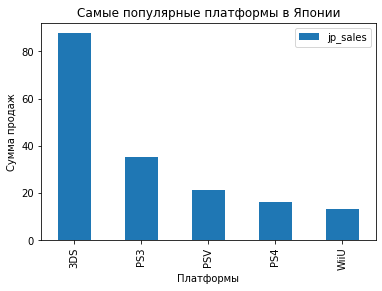

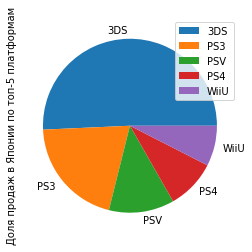

In [28]:
#топ-5 популярных платформ
na_sales_platform = df_query.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_sales_platform.plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.title('Самые популярные платформы в Северной Америке')
plt.show()
na_sales_platform.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Северной Америке по топ-5 платформам')
plt.show()
 
eu_sales_platform = df_query.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_sales_platform.plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.title('Самые популярные платформы в Европе')
plt.show()
eu_sales_platform.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Европе по топ-5 платформам')
plt.show()
 
jp_sales_platform = df_query.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_sales_platform.plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.title('Самые популярные платформы в Японии')
plt.show()
jp_sales_platform.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Японии по топ-5 платформам')
plt.show()

Можно сделать вывод согласно графикам и круговым диаграммам, что продажи по платформам в Европе и Северной Америке имеют сходную структуру (PS4, X360, PS3, Xone, 3DS), в то время как продажи по платформам в Японии сильно отличаются и явялются крайне специфическим. Две платформы WiiU и 3DS входят в топ-5 по продажам в Японии, при этом 3DS занимет долю более 50%. 

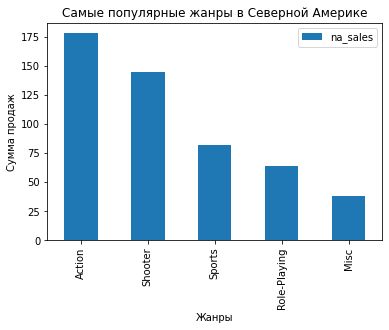

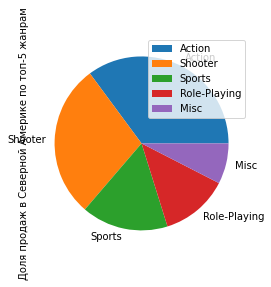

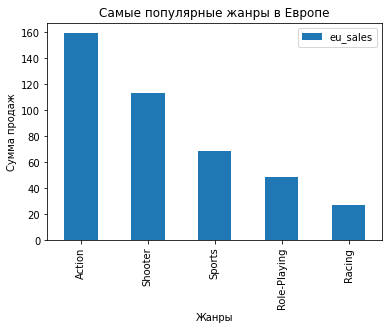

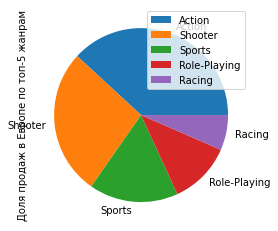

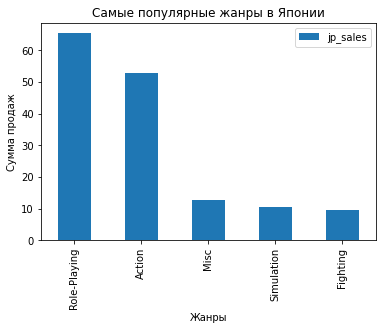

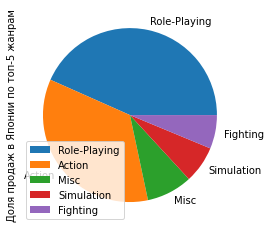

In [29]:
#топ-5 популярных жанров
na_sales_genre = df_query.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_sales_genre.plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.title('Самые популярные жанры в Северной Америке')
plt.show()
na_sales_genre.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Северной Америке по топ-5 жанрам')
plt.show()
 
eu_sales_genre = df_query.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_sales_genre.plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.title('Самые популярные жанры в Европе')
plt.show()
eu_sales_genre.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Европе по топ-5 жанрам')
plt.show()
 
jp_sales_genre = df_query.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_sales_genre.plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.title('Самые популярные жанры в Японии')
plt.show()
jp_sales_genre.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Японии по топ-5 жанрам')
plt.show()

Можно сделать вывод согласно графикам и круговым диаграммам, что продажи по жанрам в Европе и Северной Америке имеют сходную структуру (Action, Shooter, Sports, Role-Play, Misc), как и для общих продаж, в то время как продажи по платформам в Японии сильно отличаются и явялются крайне специфическим. В Японии самым популярным жанром является Role-Play, также стоит отметить жанры Simulation и Fighting. 

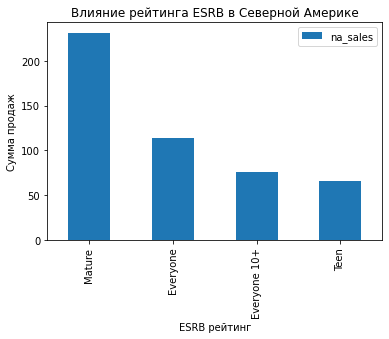

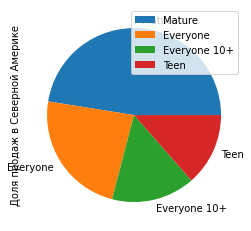

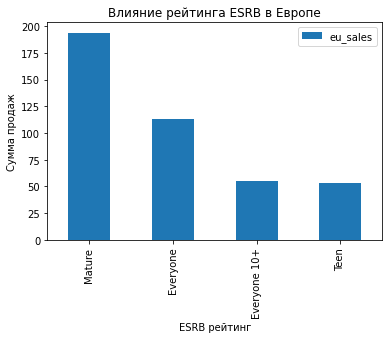

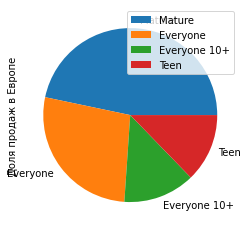

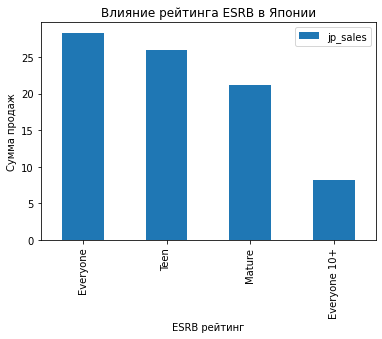

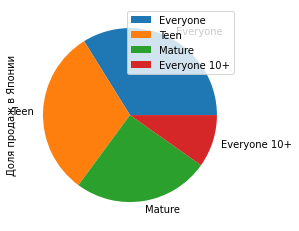

In [30]:
pd.options.mode.chained_assignment = None
#определим, влияет ли рейтинг ESRB на продажи в отдельном регионе
ESRB = {'E': 'Everyone', 'M': 'Mature', 'T': 'Teen', 'E10+': 'Everyone 10+', 'EC': 'Early Childhood'}
df_query['ESRB_description'] = df_query[df_query['rating'].notnull()]['rating'].map(ESRB)

na_sales_ESRB = df_query.groupby(by='ESRB_description').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
na_sales_ESRB.plot(kind='bar')
plt.xlabel('ESRB рейтинг')
plt.ylabel('Сумма продаж')
plt.title('Влияние рейтинга ESRB в Северной Америке')
plt.show()
na_sales_ESRB.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Северной Америке')
plt.show()

 
eu_sales_ESRB = df_query.groupby(by='ESRB_description').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
eu_sales_ESRB.plot(kind='bar')
plt.xlabel('ESRB рейтинг')
plt.ylabel('Сумма продаж')
plt.title('Влияние рейтинга ESRB в Европе')
plt.show()
eu_sales_ESRB.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Европе')
plt.show()

 
jp_sales_ESRB = df_query.groupby(by='ESRB_description').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
jp_sales_ESRB.plot(kind='bar')
plt.xlabel('ESRB рейтинг')
plt.ylabel('Сумма продаж')
plt.title('Влияние рейтинга ESRB в Японии')
plt.show()
jp_sales_ESRB.plot(kind='pie', subplots=True)
plt.ylabel('Доля продаж в Японии')
plt.show()


Можно сделать вывод согласно графикам и круговым диаграммам, что продажи по рейтингам в Европе и Северной Америке имеют сходную структуру и лидируют продажи с рейтингом Mature, что свидетельствует о том, что пткупателями являются взрослые люди 18+ (около 50%), в то время как продажи по платформам в Японии сильно отличаются и явялются крайне специфическим. В Японии чаще всего покупают игры с рейтингом Everyone и Teen. 

<strong><font size=5>4.1.1. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Сделаем общий вывод, что в Японии крайне специфический рынок продажи игр, о чем свидетельствует анализ по жанрам, рейтингам и платформам.

<strong><font size=5>5. Проверьте гипотезы</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

<strong><font size=5>5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [31]:
xbox_one = df_query[(df_query['platform'] == "XOne") & (df_query['user_score'] >= 0)]['user_score']
pc = df_query[(df_query['platform'] == "PC") & (df_query['user_score'] >= 0)]['user_score']

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; </br>
H1: Средние пользовательские рейтинги платформ Xbox One и PC разные;

Для сравнения двух дисперсий независимых выборок используем Тест Левена.
Для проверки статистических гипотез будем использовать Тест Стьюдента.

In [32]:
# Тест Левена
W1, pval1 = st.levene(xbox_one, pc, center='median')
print(W1)
print(pval1)

6.295287176069245
0.01251484281850554


Соответственно дисперсии равны, поэтому используем equal_var=True

In [33]:
#Тест Стьюдента

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xbox_one, pc, equal_var=True)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не можем отвергнуть нулевую гипотезу


<strong><font size=5>5.2. Средние пользовательские рейтинги жанров Action и Sports разные</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [34]:
action = df_query[(df_query['genre'] == "Action") & (df_query['user_score'] >= 0)]['user_score']
sports = df_query[(df_query['genre'] == "Sports") & (df_query['user_score'] >= 0)]['user_score']

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для сравнения двух дисперсий независимых выборок используем Тест Левена.
Для проверки статистических гипотез будем использовать Тест Стьюдента.

In [35]:
# Тест Левена
W1, pval1 = st.levene(action, sports, center='median')
print(W1)
print(pval1)

19.259864452764166
1.3125789036876737e-05


Соответственно дисперсии равны, поэтому используем equal_var=True

In [36]:
#Тест Стьюдента

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action, sports, equal_var=True)

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


<strong><font size=5>5.3. Вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

По результатам анализа получилось, что мы не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги двух выборок по платформам Xone и PC равны. Соответственно предварительно предположим, что средние двух выборок равны и на 19% определяется случайными величинами.
По результатам анализа получилось, что мы отвергаем гипотезу о равенстве средних двух выборок с двумя жанрами Action и Sports по результатам проведения Теста Стьюдента. 

<strong><font size=5>Общий вывод</font></strong><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

По результатам анализа было выяснено, что наиболее перспективными платформами являются PS4 и Xone в целом, но в то же время специфической платформой для Японии явялется 3DS. Также можно спрогнрозировать, что наиболее популярными играми будут игры с жанром Action. Для 2017 года будут характерен выпуск игр с жанром Mature, т.е. игр с возрастным цензом 18+. 
Рекламная компания должна строиться исходя из данных характеристик, это позволит сделать ставку на потенциально популярный продукт. Но важно отметить, что так как для Японии жанры и платформы специфичны, следует это учитывать при прогнозе. 